/var/folders/cz/_pyz_5qn69155q4_bc51whp00000gn/T/ipykernel_3258/1966214777.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_billions['Education'] = filtered_billions['Education'].astype(str)
/var/folders/cz/_pyz_5qn69155q4_bc51whp00000gn/T/ipykernel_3258/1966214777.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_billions['Education Level'] = filtered_billions['Education'].apply(categorize_education)


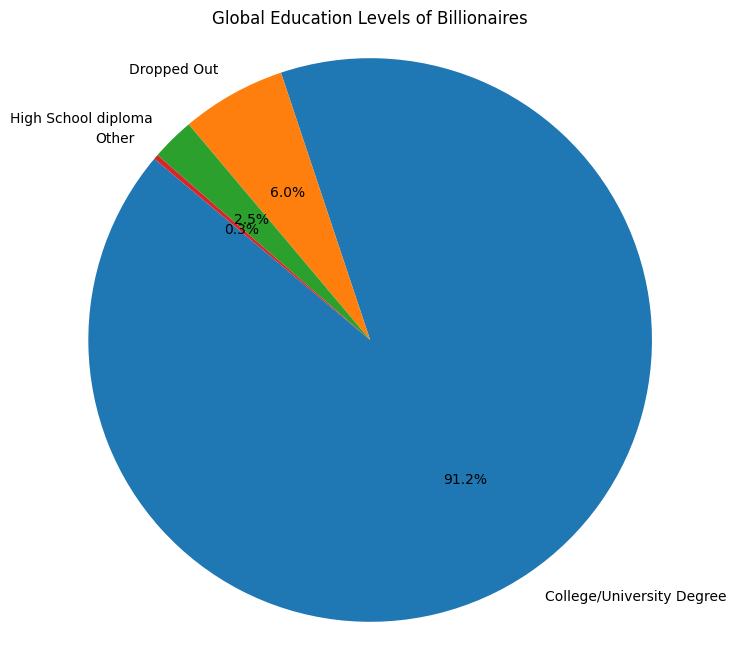

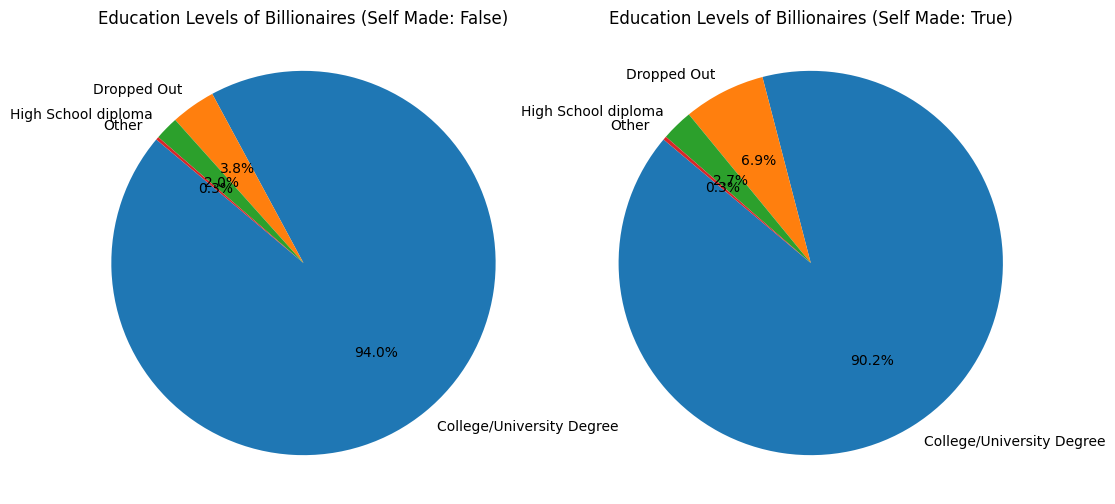

In [16]:
# import modules, set the file path and read the csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
final_billions = "/Users/yenori/Desktop/GitHub/project-1/Final_Billionaires_Statistics.csv"
billions_csv = pd.read_csv(final_billions)

# Drop na values in Education column
filtered_billions = billions_csv.dropna(subset=['Education'])

# Convert float values to strings
filtered_billions['Education'] = filtered_billions['Education'].astype(str)

# Categorize Education values
def categorize_education(education):
    if 'Drop Out' in education:
        return 'Dropped Out'
    elif 'High School' in education:
        return 'High School diploma'
    elif 'error' in education:
        return 'Other'
    else:
        return 'College/University Degree'

# Create a new 'Education Level' column
filtered_billions['Education Level'] = filtered_billions['Education'].apply(categorize_education)
EducationLevel = filtered_billions['Education Level']

# Education Levels of Billionaires pie chart 
plt.figure(figsize=(8, 8))
plt.pie(EducationLevel.value_counts(), labels=EducationLevel.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Global Education Levels of Billionaires')
plt.axis('equal')
plt.show()

# Group billionaires by self-made
selfMade_groups = filtered_billions.groupby(selfMade)

# Create two subplots for the pie charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Iterate through each group ('True' and 'False')
for i, (status, group) in enumerate(selfMade_groups):
    labels = group['Education Level'].value_counts().index
    sizes = group['Education Level'].value_counts().values
    ax = axes[i]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Education Levels of Billionaires (Self Made: {status})')
    ax.axis('equal')
